# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [1]:
import requests, re, nltk, time
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014'] + ['project','gutenberg','','â','“you','“i',
 'â\x80\x9ci','â\x80\x9ci','donâ\x80\x99t','â\x80\x9cand','gutenberg-tm','“and','im']

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)
    
    wfs_orig = wfs
    
    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        

In [2]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')



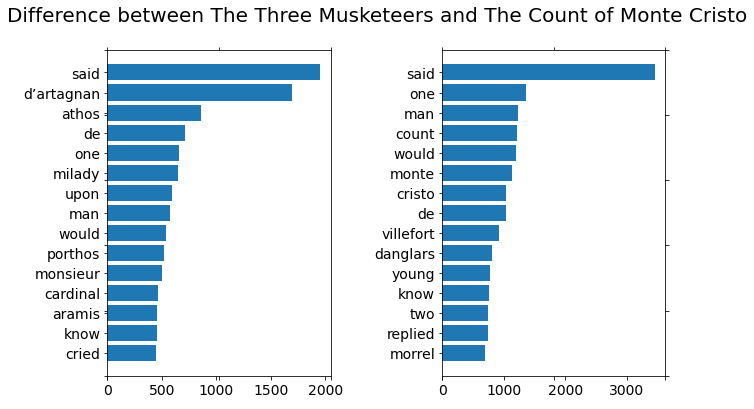

In [3]:
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/1257/pg1257.txt')
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/cache/epub/1184/pg1184.txt')

plotTwoLists (wf_ee, wf_bu, "Difference between The Three Musketeers and The Count of Monte Cristo")


In [4]:
# Reverse list for ease of use
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

# Loop through to print top 15 names for each novel
print("The Three Musketeers' 15 most common words in order:")
i = 0
while i < len(wf_ee)-1:
    print(str(wf_ee[i][0]) + ", ", end='')
    i = i + 1
    if i == len(wf_ee) - 1:
        print(str(wf_ee[i][0]), end='\n\n') 
        
print("The Count of Monte Cristo's 15 most common words in order:")
j = 0
while j < len(wf_bu)-1:
    print(str(wf_bu[j][0]) + ", ", end='')
    j = j + 1
    if j == len(wf_bu) - 1:
        print(str(wf_bu[j][0]), end='\n\n') 

# Loop through and find which words are shared between novels and print them
print('Shared words, # of times written, and order in list:\n')
i = 0
j = 0
numShared = 0
while i < len(wf_bu):
    if wf_ee[i][0] == wf_bu[j][0]:
        print('"' + str(wf_ee[i][0]) + '"\n    TTM: ' + str(wf_ee[i][1]) + '\tRank: ' +str(i+1) )
        print('    CMC: ' + str(wf_bu[j][1]) + '\tRank: ' +str(j+1) )
        numShared = numShared + 1
    j = j+1
    if j >= len(wf_bu):
        i = i+1
        j = 0
print('\nThe number of shared words written: ' + str(numShared) + '/' + str(len(wf_ee)))
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

The Three Musketeers' 15 most common words in order:
said, d’artagnan, athos, de, one, milady, upon, man, would, porthos, monsieur, cardinal, aramis, know, cried

The Count of Monte Cristo's 15 most common words in order:
said, one, man, count, would, monte, cristo, de, villefort, danglars, young, know, two, replied, morrel

Shared words, # of times written, and order in list:

"said"
    TTM: 1949	Rank: 1
    CMC: 3457	Rank: 1
"de"
    TTM: 710	Rank: 4
    CMC: 1033	Rank: 8
"one"
    TTM: 653	Rank: 5
    CMC: 1363	Rank: 2
"man"
    TTM: 571	Rank: 8
    CMC: 1226	Rank: 3
"would"
    TTM: 539	Rank: 9
    CMC: 1196	Rank: 5
"know"
    TTM: 451	Rank: 14
    CMC: 767	Rank: 12

The number of shared words written: 6/15


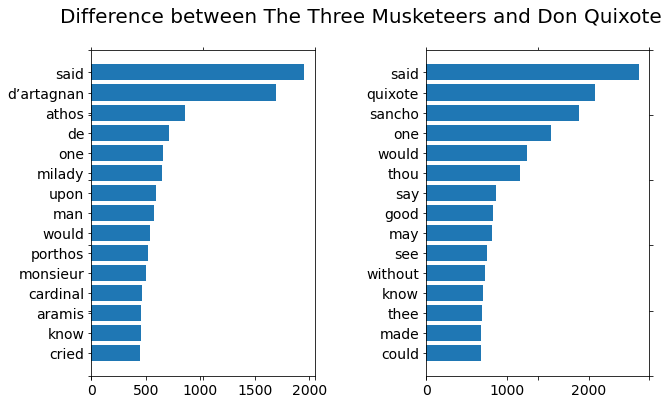

In [5]:
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/1257/pg1257.txt')
(wf_bu, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/996/pg996.txt')

plotTwoLists (wf_ee, wf_bu, 'Difference between The Three Musketeers and Don Quixote')

In [6]:
# Reverse list for ease of use
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

# Loop through to print top 15 names for each novel
print("The Three Musketeers' 15 most common words in order:")
i = 0
while i < len(wf_ee)-1:
    print(str(wf_ee[i][0]) + ", ",end='')
    i = i + 1
    if i == len(wf_ee) - 1:
        print(str(wf_ee[i][0]), end='\n\n') 

print("Don Quixote's 15 most common words in order:")
j = 0
while j < len(wf_bu)-1:
    print(str(wf_bu[j][0]) + ", ",end='')
    j = j + 1
    if j == len(wf_bu) - 1:
        print(str(wf_bu[j][0]), end='\n\n') 

# Loop through and find which words are shared between novels and print them
print('Shared words, # of times written, and order in list:\n')
i = 0
j = 0
numShared = 0
while i < len(wf_bu):
    if wf_ee[i][0] == wf_bu[j][0]:
        print('"' + str(wf_ee[i][0]) + '"\n    TTM: ' + str(wf_ee[i][1]) + '\tRank: ' +str(i+1) )
        print("     DQ: " + str(wf_bu[j][1]) + '\tRank: ' +str(j+1) )
        numShared = numShared + 1
    j = j+1
    if j >= len(wf_bu):
        i = i+1
        j = 0
        
print('\nThe number of shared words written: ' + str(numShared) + '/' + str(len(wf_ee)))
wf_ee = wf_ee[::-1]
wf_bu = wf_bu[::-1]

The Three Musketeers' 15 most common words in order:
said, d’artagnan, athos, de, one, milady, upon, man, would, porthos, monsieur, cardinal, aramis, know, cried

Don Quixote's 15 most common words in order:
said, quixote, sancho, one, would, thou, say, good, may, see, without, know, thee, made, could

Shared words, # of times written, and order in list:

"said"
    TTM: 1949	Rank: 1
     DQ: 2615	Rank: 1
"one"
    TTM: 653	Rank: 5
     DQ: 1538	Rank: 4
"would"
    TTM: 539	Rank: 9
     DQ: 1240	Rank: 5
"know"
    TTM: 451	Rank: 14
     DQ: 694	Rank: 12

The number of shared words written: 4/15


In [7]:
print("To start, both authors' works have been translated from their original languages, French for Alexandre Dumas's The Three Musketeers and The Count of Monte Cristo and Spanish for Miguel de Cervantes's Don Quixote. As such, the difference in word choice also relies heavily on the translators and their choices. The most obvious between the two works is Don Quixote's usage of 'thou' and 'thee' to signify the age that the work was written. Don Quixote was written in two parts, in 1605 and 1615, about 230 years earlier than Durmas's two works. In contrast, Dumas's two works have the words 'de' and 'monsieur' which are French words taken and used through out the translated works to convey the traditionally French setting of the story. When comparing the most common shared words between the two, however, the similiarties only lie at the most fundamental level of word choice with words such as 'said','one','would', and 'know' being frequently used. Unsurprisingly, the names of the main characters from both works take the some the highest spots.") 

To start, both authors' works have been translated from their original languages, French for Alexandre Dumas's The Three Musketeers and The Count of Monte Cristo and Spanish for Miguel de Cervantes's Don Quixote. As such, the difference in word choice also relies heavily on the translators and their choices. The most obvious between the two works is Don Quixote's usage of 'thou' and 'thee' to signify the age that the work was written. Don Quixote was written in two parts, in 1605 and 1615, about 230 years earlier than Durmas's two works. In contrast, Dumas's two works have the words 'de' and 'monsieur' which are French words taken and used through out the translated works to convey the traditionally French setting of the story. When comparing the most common shared words between the two, however, the similiarties only lie at the most fundamental level of word choice with words such as 'said','one','would', and 'know' being frequently used. Unsurprisingly, the names of the main characte